In [314]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [315]:
df = pd.read_csv("C:\\Users\\thebl\\Documents\\Lomba\\SatDat2024\\FullSenyum-SatriaData2024\\DataSet\\cleaned_final_label.txt")
df

,text,label,stemmed_text,label_angka
0,kunjungan prabowo untuk meresmikan menyerahkan...,Sumber Daya Alam,kunjung prabowo untuk resmi serah proyek bantu...,5
1,anies tepuk tangan meriah jadi rektor mewajibk...,Politik,anies tepuk tangan riah jadi rektor wajib mata...,0
2,emng bener sih pendukung anies juga pendukung ...,Demografi,emng bener sih dukung anies juga dukung prabow...,6
3,sewaktu anies bersikap kritis kinerja pak prab...,Politik,waktu anies sikap kritis kerja pak prabowo ang...,0
4,anies baswedan harap asn termasuk tni polri pe...,Politik,anies baswedan harap asn masuk tni polri pegan...,0
...,...,...,...,...
4578,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,ngeliat debat kemaren pas prabowo kicep kira k...,0
4579,masyarakat yakin prabowo gibran memiliki visi ...,Politik,masyarakat yakin prabowo gibran milik visi jal...,0
4580,imo both are irrational but satu jauh lebih ir...,Ekonomi,imo both are irrational but satu jauh lebih ir...,4
4581,look at that pak ganjar sudah berkecimpung lgi...,Pertahanan dan Keamanan,look at that pak ganjar sudah kecimpung lgisla...,3


In [316]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [317]:
# Fitting and transforming the 'Category' column
X_train, X_test, y_train, y_test = train_test_split(
    df.stemmed_text,
    df.label_angka,
    test_size=0.2,
    random_state=48,
    stratify=df.label_angka
)

              precision    recall  f1-score   support

           0       0.85      0.58      0.69       590
           1       0.33      0.48      0.39        84
           2       0.46      0.56      0.50        68
           3       0.53      0.82      0.65        66
           4       0.40      0.68      0.50        62
           5       0.27      0.52      0.35        31
           6       0.13      0.42      0.20        12
           7       0.00      0.00      0.00         4

    accuracy                           0.59       917
   macro avg       0.37      0.51      0.41       917
weighted avg       0.69      0.59      0.61       917

Balanced Accuracy: 0.51
Confusion Matrix:
 [[342  67  39  41  46  27  25   3]
 [ 19  40   3   4   6   7   5   0]
 [ 15   7  38   1   2   2   3   0]
 [  8   2   1  54   1   0   0   0]
 [  8   2   1   1  42   7   0   1]
 [  6   1   0   0   8  16   0   0]
 [  3   2   1   0   1   0   5   0]
 [  2   1   0   0   0   1   0   0]]


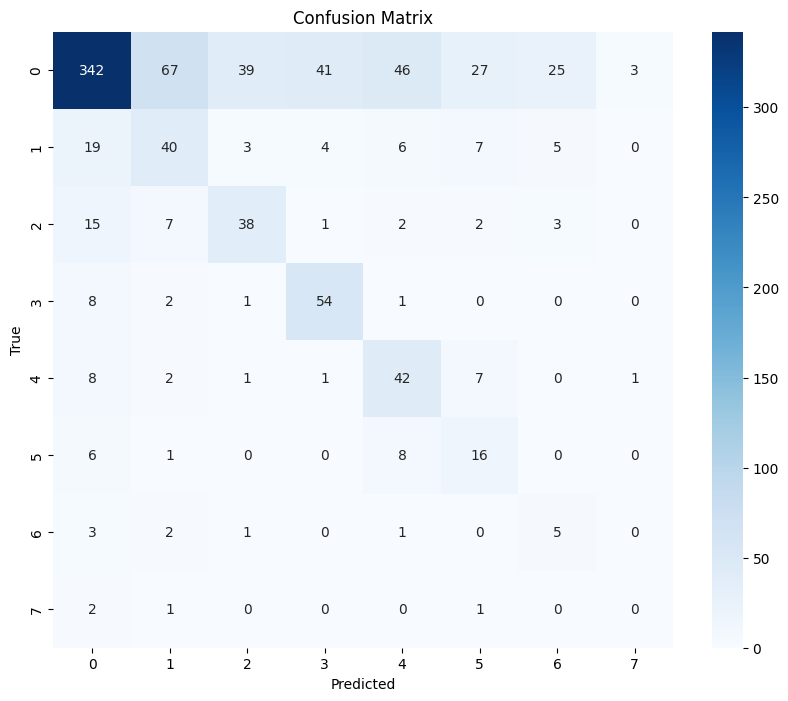

In [318]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SVMSMOTE
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('SVM_smote', SVMSMOTE(random_state=102)),
    ('svc', SVC(kernel='linear'))
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [319]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming process_df is your DataFrame with 'stemmed_text' and 'encoded_label'
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.stemmed_text,
    df.label_angka,
    test_size=0.2,
    random_state=48,
    stratify=df.label_angka
)

# Define the pipeline with imblearn's Pipeline
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('Multi NB', MultinomialNB())
])

# Define the stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the training set and get results
scores = cross_validate(clf, X_train, y_train, cv=cv, scoring=['accuracy', 'balanced_accuracy', 'f1_macro'])

print(f"Cross-Validation Accuracy: {scores['test_accuracy'].mean():.2f}")
print(f"Cross-Validation Balanced Accuracy: {scores['test_balanced_accuracy'].mean():.2f}")
print(f"Cross-Validation F1 Macro: {scores['test_f1_macro'].mean():.2f}")


Cross-Validation Accuracy: 0.59
Cross-Validation Balanced Accuracy: 0.50
Cross-Validation F1 Macro: 0.41


In [320]:
import csv

# Baca file teks
with open('"C:\\Users\\thebl\\Documents\\Lomba\\SatDat2024\\FullSenyum-SatriaData2024\\DataSet\\cleaned_final_label.txt"', 'r', encoding='utf-8') as txt_file:
    lines = txt_file.readlines()

# Tulis data ke file CSV
with open('data.csv', 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    
    for line in lines:
        # Split setiap baris berdasarkan koma (delimiter)
        row = line.strip().split(',')
        writer.writerow(row)

print("File teks berhasil dikonversi menjadi file CSV.")

OSError: [Errno 22] Invalid argument: '"C:\\Users\\thebl\\Documents\\Lomba\\SatDat2024\\FullSenyum-SatriaData2024\\DataSet\\cleaned_final_label.txt"'